In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input



In [2]:
data = np.load('DatasetOrlFaces.npz')

print(data.files)

['testY', 'testX', 'trainX', 'trainY']


In [3]:
#Pre-processing pipeline for the image data

#Load the dataset

x_train = data['trainX']
y_train = data['trainY']
x_test = data['testX']
y_test = data['testY']


# Normalize the pixel values to [0, 1]
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

#Reshape the x_train and x_test to be fed into the CNN since the data is 2D and CNN expects 3D

x_train = x_train.reshape(x_train.shape[0], 112, 92, 1)
x_test = x_test.reshape(x_test.shape[0], 112, 92, 1)


In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models


# Step 5: Build the CNN model
model = models.Sequential()
model.add(Input(shape=(112, 92, 1)))  # Use Input(shape) as the first layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(40, activation='softmax'))

# Step 6: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))




Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0418 - loss: 3.5264 - val_accuracy: 0.1312 - val_loss: 3.1588
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.1125 - loss: 2.9922 - val_accuracy: 0.3562 - val_loss: 2.4430
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5094 - loss: 2.1716 - val_accuracy: 0.3750 - val_loss: 2.0355
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5743 - loss: 1.5841 - val_accuracy: 0.5813 - val_loss: 1.4939
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8199 - loss: 0.8862 - val_accuracy: 0.8250 - val_loss: 0.8229
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9560 - loss: 0.3977 - val_accuracy: 0.8687 - val_loss: 0.4673
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9865 - loss: 0.1079 - val_accuracy: 0.9375 - val_loss: 0.3498
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 1.0000 - loss: 0.0513 - val_accuracy: 0.9375 - val_loss: 0.2505


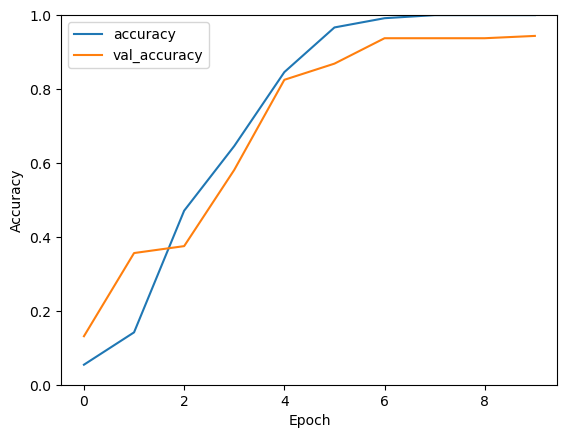

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0, 1])
plt.legend(loc = 'upper left')

plt.show()



In [44]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(x_test, y_test) #This step was just to check if the model is overfitting or not.

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)
print("Validation Loss", val_loss)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9643 - loss: 0.1902
Validation Accuracy: 0.9437500238418579
Validation Loss 0.268078088760376
